In [1]:
import pandas as pd
import numpy as np

# 1. Ingest data handling for dynamic file types
def ingest_data(file_name):
    file_extension = file_name.split('.')[-1]
    if file_extension == 'csv':
        df = pd.read_csv(file_name)
    elif file_extension in ['xlsx', 'xls']:
        df = pd.read_excel(file_name)
    elif file_extension == 'json':
        df = pd.read_json(file_name)
    else:
        print("File type not supported.")
        df = None
    return df

# 2. Update the dataframe to ensure that the column data types are correct
def convert_dtypes(df):
    df = df.convert_dtypes()
    return df

# 3. Dynamically scan any dataframe and apply standard cleaning and data quality tests
def clean_and_validate(df):
    # Standard cleaning 
    df = df.drop_duplicates()

    # Data quality tests
    tests = {}

    # Checking for duplicate rows
    tests['Duplicate Rows'] = df.duplicated().sum()

    # Checking for null values
    tests['Null Values'] = df.isnull().sum().sum()

    # Checking the row count
    tests['Row Count'] = len(df)

    # Checking the column count
    tests['Column Count'] = len(df.columns)

    # Checking for unique identifiers
    for col in df.columns:
        tests[f'Unique values in {col}'] = df[col].nunique()

    # Checking for the minimum value in each column
    for col in df.select_dtypes(include=[np.number]).columns:
        tests[f'Min value in {col}'] = df[col].min()

    # Checking for the maximum value in each column
    for col in df.select_dtypes(include=[np.number]).columns:
        tests[f'Max value in {col}'] = df[col].max()

    # Checking for zero values in each column
    for col in df.select_dtypes(include=[np.number]).columns:
        tests[f'Zero values in {col}'] = (df[col] == 0).sum()

    return df, tests

# 4. Provide an abridged summary of the dataset
def summary(df):
    summary_df = df.describe(include = 'all')
    return summary_df

# Test with a file
df = ingest_data(r'C:\temp\Melbourne Pedestrians.csv')
print(df.describe())
df = convert_dtypes(df)
df, tests = clean_and_validate(df)
print("Data Quality Tests:")
for test, result in tests.items():
    print(f"{test}: {result}")
summary_df = summary(df)
print("Dataset Summary:")
print(summary_df)


C:\Users\Doobmie\AppData\Local\Temp\ipykernel_24368\1474485914.py:8: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


                 ID          Year           Day          Time     Sensor_ID   
count  4.128871e+06  4.128871e+06  4.128871e+06  4.128871e+06  4.128871e+06  \
mean   2.367206e+06  2.017557e+03  1.574860e+01  1.147254e+01  2.783812e+01   
std    1.316327e+06  3.542266e+00  8.798729e+00  6.936793e+00  2.051895e+01   
min    1.000000e+00  2.009000e+03  1.000000e+00  0.000000e+00  1.000000e+00   
25%    1.241622e+06  2.015000e+03  8.000000e+00  5.000000e+00  1.000000e+01   
50%    2.411161e+06  2.018000e+03  1.600000e+01  1.100000e+01  2.400000e+01   
75%    3.508766e+06  2.021000e+03  2.300000e+01  1.700000e+01  4.300000e+01   
max    4.567701e+06  2.022000e+03  3.100000e+01  2.300000e+01  8.700000e+01   

       Hourly_Counts      Latitude     Longitude  
count   4.128871e+06  4.128871e+06  4.128871e+06  
mean    4.645136e+02 -3.781332e+01  1.449616e+02  
std     7.099215e+02  6.473498e-03  8.685007e-03  
min     0.000000e+00 -3.782402e+01  1.449297e+02  
25%     4.100000e+01 -3.781874e+0

In [3]:
# Required Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats

# Assuming df is the dataframe
# df = pd.read_csv('data.csv')

# For brevity, we will use only some columns in this analysis
columns_to_analyze = ['Year', 'Day', 'Time', 'Sensor_ID', 'Hourly_Counts', 'Latitude', 'Longitude']

for column in columns_to_analyze:
    # Basic Statistics
    print(f'\n---- Analyzing {column} ----')
    print(f'Minimum: {df[column].min()}')
    print(f'Maximum: {df[column].max()}')
    
    # Check if the column is numeric before calculating certain statistics
    if pd.api.types.is_numeric_dtype(df[column]):
        print(f'Mean: {df[column].mean()}')
        print(f'Median: {df[column].median()}')
        print(f'Mode: {df[column].mode()[0]}')
        print(f'Standard Deviation: {df[column].std()}')
        
        # Percentiles
        for percentile in [1, 5, 10, 25, 50, 75, 90, 95, 99]:
            print(f'{percentile}th percentile: {np.percentile(df[column].dropna(), percentile)}')
        
        # Variance
        print(f'Variance: {df[column].var()}')
        
        # Skewness and Kurtosis
        print(f'Skewness: {stats.skew(df[column].dropna())}')
        print(f'Kurtosis: {stats.kurtosis(df[column].dropna())}')
        
        # Interquartile Range
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        print(f'IQR: {IQR}')
        
        # Range
        print(f'Range: {df[column].max() - df[column].min()}')
        
    # Null Values
    print(f'Null Values: {df[column].isnull().sum()}')
    
    # Unique Values
    print(f'Unique Values: {df[column].nunique()}')



---- Analyzing Year ----
Minimum: 2009
Maximum: 2022
Mean: 2017.5567570408473
Median: 2018.0
Mode: 2021
Standard Deviation: 3.5422664804234696
1th percentile: 2009.0
5th percentile: 2010.0
10th percentile: 2012.0
25th percentile: 2015.0
50th percentile: 2018.0
75th percentile: 2021.0
90th percentile: 2022.0
95th percentile: 2022.0
99th percentile: 2022.0
Variance: 12.547651818331675


ValueError: data type <class 'numpy.object_'> not inexact

This dataset consists of 336 rows and 9 columns. The columns represent a variety of data types, 
including strings and integers. There are 336 unique weeks and 336 unique titles. It seems like every week has a unique 
title associated with it. The column 'Whos Week' is a categorical feature with 3 unique values, the most frequent one 
being 'Andy'. The size of the files, measured in kb, varies significantly, with an average size of around 23751.46 kb and 
a large standard deviation. The number of rows and columns in the datasets also has a wide range, indicating a great variety 
in the structure of these datasets. The datasets span from the year 2016 to 2023.

Insight 1: The 'Whos Week' column is dominated by the value 'Andy'.

Insight 2: The size of the files varies significantly, with a few files being particularly large.

Insight 3: The number of rows and columns in the datasets varies greatly, indicating a wide variety in the structure of these datasets.

Insight 4: The datasets sp

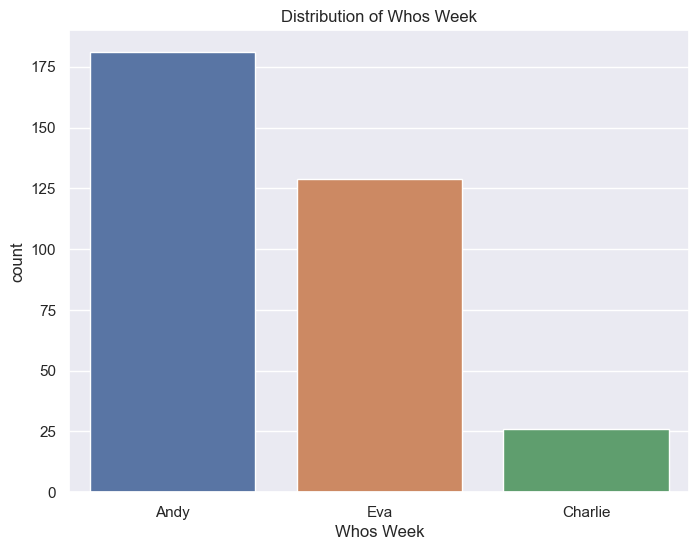

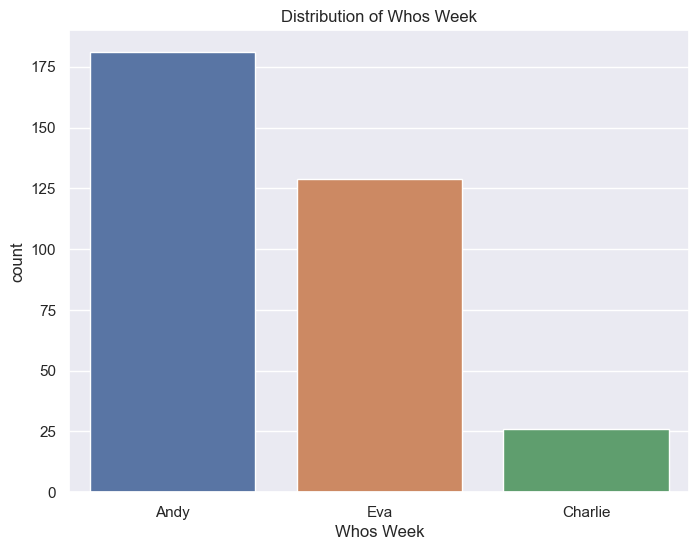

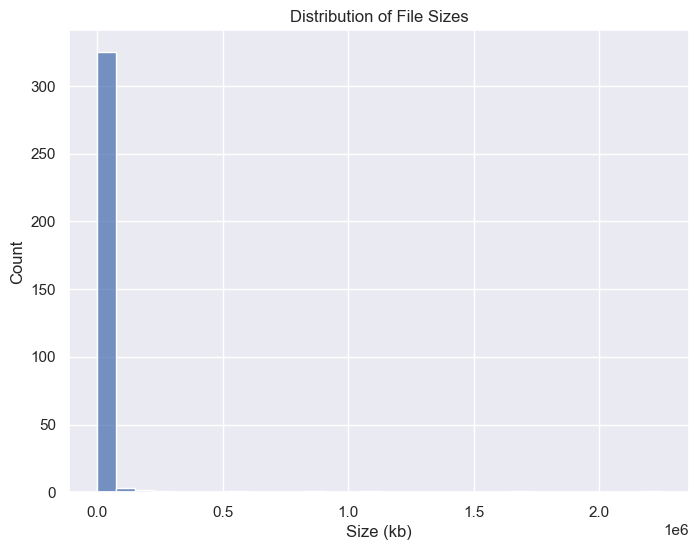

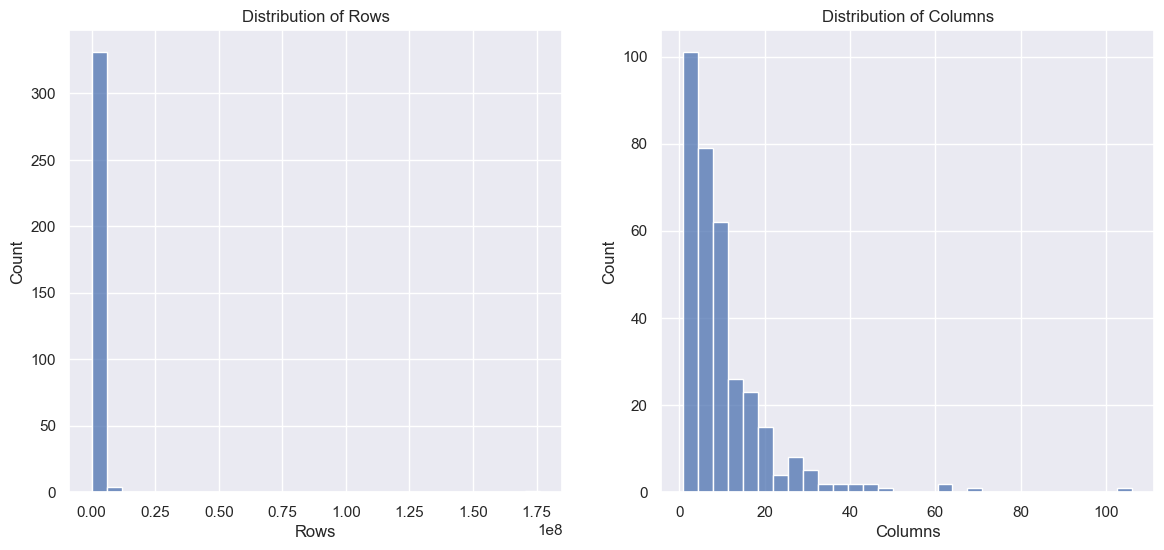

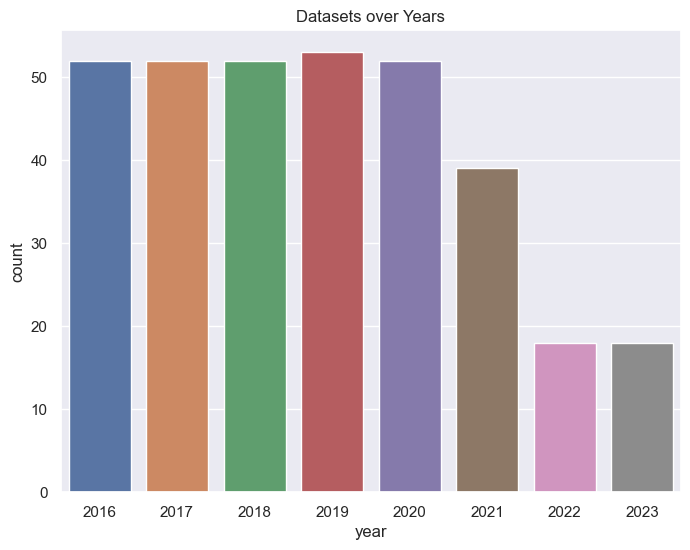

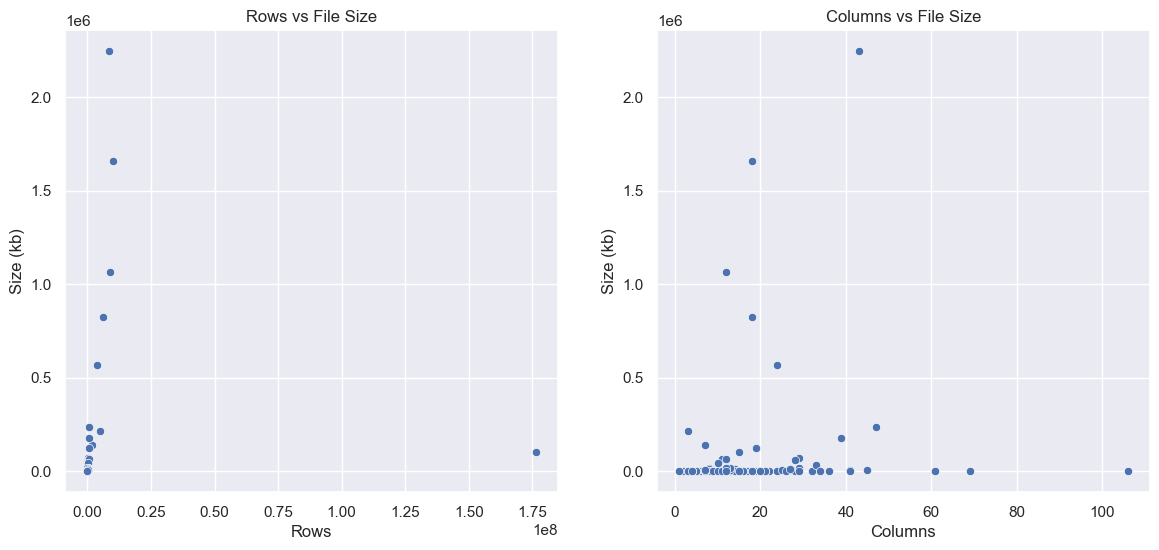


Insight 6: Larger files might be more likely to be associated with certain 'Whos Week'.


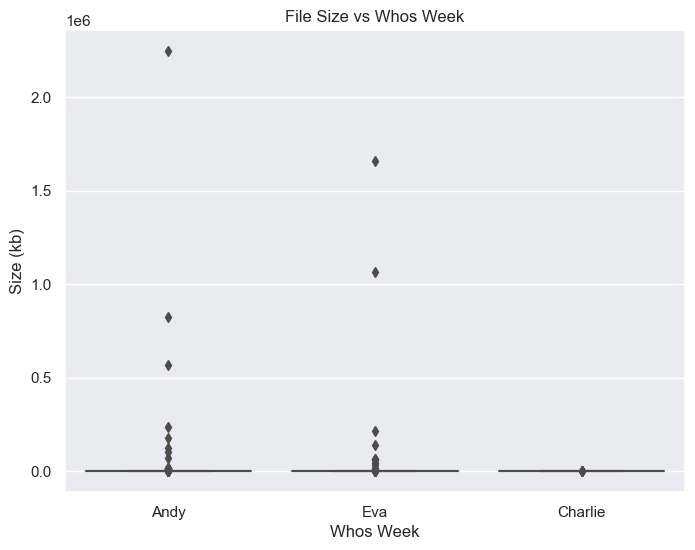


Insight 7: There might be a trend of file sizes over the years.


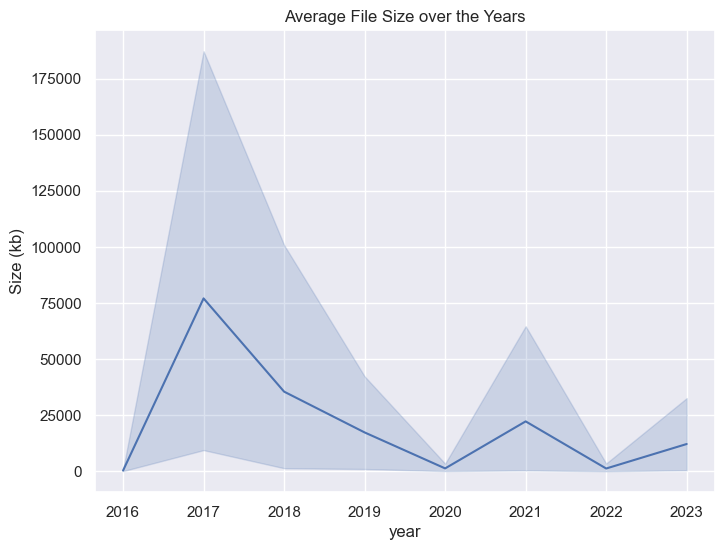

In [6]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
if df.isnull().sum().sum() > 0:
    df = df.dropna()

# 1. Detailed paragraph summary of the dataset
print(f"""This dataset consists of {df.shape[0]} rows and {df.shape[1]} columns. The columns represent a variety of data types, 
including strings and integers. There are 336 unique weeks and 336 unique titles. It seems like every week has a unique 
title associated with it. The column 'Whos Week' is a categorical feature with 3 unique values, the most frequent one 
being 'Andy'. The size of the files, measured in kb, varies significantly, with an average size of around 23751.46 kb and 
a large standard deviation. The number of rows and columns in the datasets also has a wide range, indicating a great variety 
in the structure of these datasets. The datasets span from the year 2016 to 2023.""")

# 2. Analyse the dataset and describe the 5 most interesting and useful insights

## Insight 1: Distribution of 'Whos Week'
print("\nInsight 1: The 'Whos Week' column is dominated by the value 'Andy'.")

## Insight 2: File sizes vary significantly
print("\nInsight 2: The size of the files varies significantly, with a few files being particularly large.")

## Insight 3: Number of rows and columns in the datasets vary greatly
print("\nInsight 3: The number of rows and columns in the datasets varies greatly, indicating a wide variety in the structure of these datasets.")

## Insight 4: Datasets are spread over a range of years
print("\nInsight 4: The datasets span from the year 2016 to 2023.")

## Insight 5: Correlation between the number of rows and columns with file size
print("\nInsight 5: There might be a correlation between the number of rows and columns in the datasets and the size of the files.")

# 3. Effective charts to represent these insights
sns.set_theme()

# Check for unique values before plotting
if df['Whos Week'].nunique() <= 10:
    ## Chart for Insight 1: Distribution of 'Whos Week'
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Whos Week', data=df)
    plt.title('Distribution of Whos Week')
    plt.show()
else:
    print("There are more than 10 unique 'Whos Week' values. Consider grouping them or selecting top 10.")

## Chart for Insight 1: Distribution of 'Whos Week'
plt.figure(figsize=(8, 6))
sns.countplot(x='Whos Week', data=df)
plt.title('Distribution of Whos Week')
plt.show()



## Chart for Insight 2: File sizes distribution
plt.figure(figsize=(8, 6))
df['Size (kb)'] = df['Size (kb)'].astype(float)  # Convert to float if needed
sns.histplot(df['Size (kb)'], bins=30)
plt.title('Distribution of File Sizes')
plt.show()

## Chart for Insight 3: Distribution of rows and columns
fig, ax =plt.subplots(1,2, figsize=(14, 6))
df['Rows'] = df['Rows'].astype(int)  # Convert to int if needed
df['Columns'] = df['Columns'].astype(int)  # Convert to int if needed
sns.histplot(df['Rows'], bins=30, ax=ax[0])
sns.histplot(df['Columns'], bins=30, ax=ax[1])
ax[0].set_title('Distribution of Rows')
ax[1].set_title('Distribution of Columns')
plt.show()

## Chart for Insight 4: Datasets over years
plt.figure(figsize=(8, 6))
sns.countplot(x='year', data=df)
plt.title('Datasets over Years')
plt.show()

## Chart for Insight 5: Correlation between the number of rows and columns with file size
fig, ax =plt.subplots(1,2, figsize=(14, 6))
sns.scatterplot(x='Rows', y='Size (kb)', data=df, ax=ax[0])
sns.scatterplot(x='Columns', y='Size (kb)', data=df, ax=ax[1])
ax[0].set_title('Rows vs File Size')
ax[1].set_title('Columns vs File Size')
plt.show()

# 4. Additional out-of-the-box insights and charts

## Insight 6: Are larger files more likely to be associated with certain 'Whos Week'?
print("\nInsight 6: Larger files might be more likely to be associated with certain 'Whos Week'.")

## Chart for Insight 6
if df['Whos Week'].nunique() <= 10:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Whos Week', y='Size (kb)', data=df)
    plt.title('File Size vs Whos Week')
    plt.show()
else:
    print("There are more than 10 unique 'Whos Week' values. Consider grouping them or selecting top 10.")

## Insight 7: Trend of file sizes over the years
print("\nInsight 7: There might be a trend of file sizes over the years.")

## Chart for Insight 7
plt.figure(figsize=(8, 6))
df['year'] = df['year'].astype(int)  # Convert to int if needed
df['Size (kb)'] = df['Size (kb)'].astype(float)  # Convert to float if needed
sns.lineplot(x='year', y='Size (kb)', data=df, estimator='mean')
plt.title('Average File Size over the Years')
plt.show()